<a href="https://colab.research.google.com/github/TrickyTroll/ML-intro/blob/master/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Première version de notre modèle

**Liens utiles**

https://www.pyimagesearch.com/2020/08/24/ocr-handwriting-recognition-with-opencv-keras-and-tensorflow/

https://www.pyimagesearch.com/2020/08/17/ocr-with-keras-tensorflow-and-deep-learning/

https://www.tensorflow.org/tutorials/keras/classification




## Les librairies nécessaires

Afin de réaliser ce projet dans des temps raisonnables, nous utilisons des
outils des des données réalisés par des organisations réputées comme Google,
[NumPy](https://numpy.org/) et la [Matplotlib](https://matplotlib.org/) 
development team.

### Tensorflow

C'est quoi tensorflow

#### Keras

C'est quoi keras

https://www.tensorflow.org/api_docs/python/tf/keras

#### MNIST

C'est quoi le MNIST

### Numpy

C'est quoi numpy et comment est ce qu'on l'utilise

### Matplotlib

C'est quoi matplotlib est comment est ce qu'on l'utilise

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Loading the minst data

In [ ]:
((train_data, train_labels), (test_data, test_labels)) = mnist.load_data()
num_data = np.vstack([train_data, test_data])
num_labels = np.hstack([train_labels, test_labels])

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_data.shape

(10000, 28, 28)

## Preprocessing

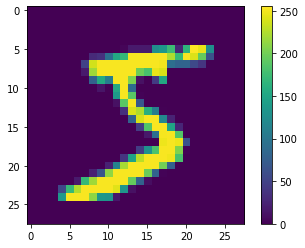

In [ ]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_labels[0]

5

In [ ]:
train_images = train_data / 255.0
test_images = test_data / 255.0

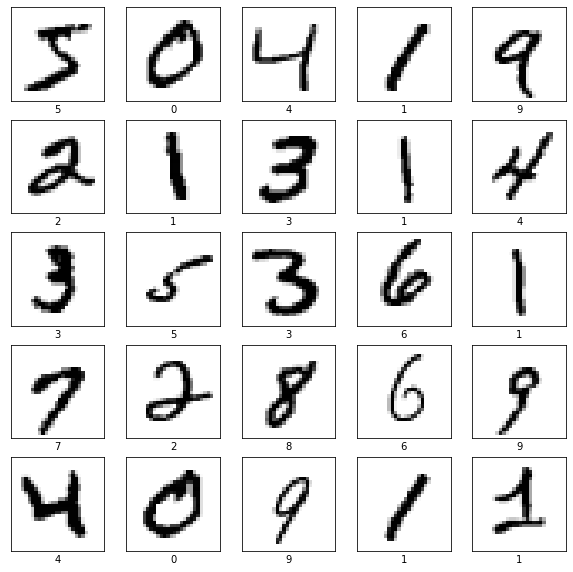

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9224
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1192 - accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0799 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0588 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0468 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0277 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0231 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0186 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0777 - accuracy: 0.9809

Test accuracy: 0.98089998960495


In [ ]:
model.save("/content/drive/My Drive/OCR_Models/test", save_format="h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([1.9955390e-08, 1.2739006e-10, 9.6577605e-07, 2.0910957e-06,
       1.5182793e-12, 3.3078618e-09, 7.3660133e-14, 9.9999642e-01,
       5.8802364e-08, 4.3237634e-07], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

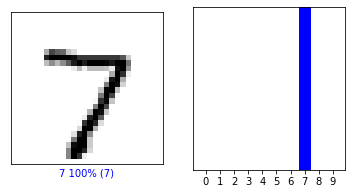

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

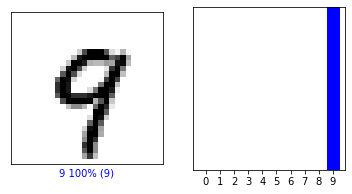

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

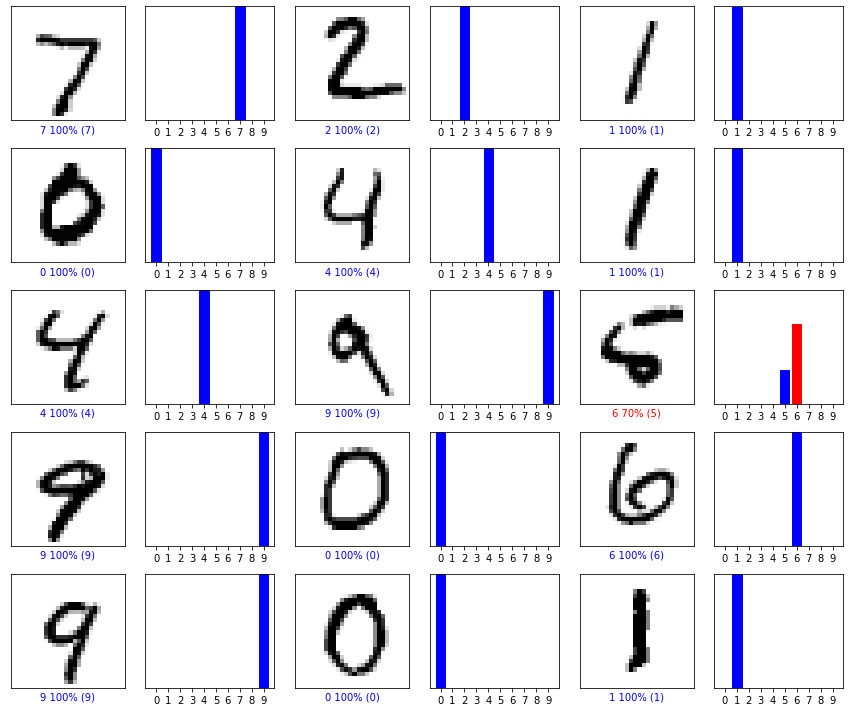

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.1491336e-10 1.4624258e-07 9.9999988e-01 4.0050294e-10 1.1449123e-27
  1.0422267e-10 1.7543905e-09 9.4141603e-21 2.1537236e-08 3.9342061e-22]]


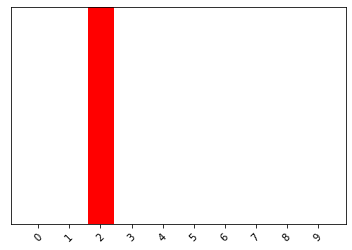

In [ ]:
plot_value_array(1, predictions_single[0], [0,1,2,3,4,5,6,7,8,9])
_ = plt.xticks(range(10), [0,1,2,3,4,5,6,7,8,9], rotation=45) #The labels are wrong

In [ ]:
np.argmax(predictions_single[0])


2

## Testing it on my own images

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


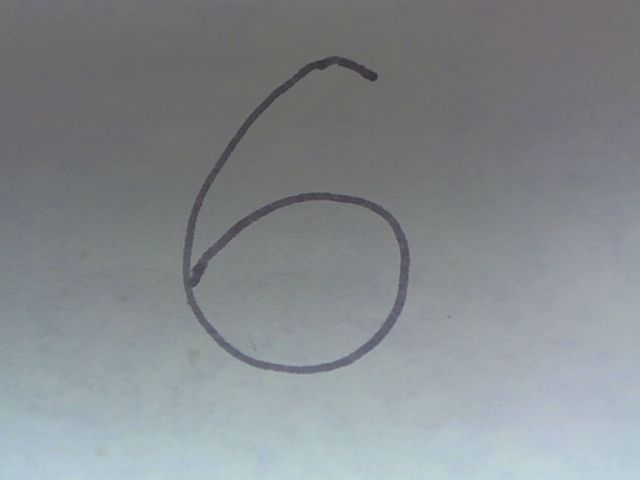

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
image = cv2.imread("photo.jpg")
resized_image = cv2.resize(image, (28, 28))
gray = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
(thresh, blackAndWhiteImage) = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)
imagem = cv2.bitwise_not(blackAndWhiteImage)
cv2_imshow(imagem)

In [ ]:
imagem.shape

(28, 28)

In [ ]:
img2 = (np.expand_dims(imagem,0))

print(img2.shape)

(1, 28, 28)


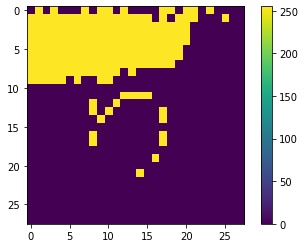

In [ ]:
plt.figure()
plt.imshow(imagem)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_array = probability_model.predict(img2)

print(predictions_array)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
predicted_label = np.argmax(predictions_array)

In [ ]:
predicted_label

3

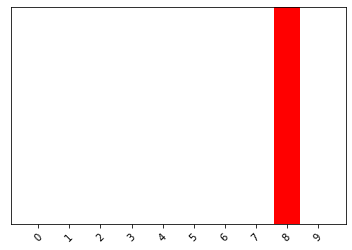

In [ ]:
plot_value_array(0, predictions_array[0], [1])
_ = plt.xticks(range(10), [0,1,2,3,4,5,6,7,8,9], rotation=45) #The labels are wrong